# Projeto 1 - Ciência dos Dados 
##### Beatriz Muniz de Castro e Silva


## Introdução



Nesse projeto proposto em sala, o objetivo é examinar uma análise exploratória de uma base de dados obtida no site GapMinder. 

O tema geral do projeto é examinar como o pertencimento à uma organização internacional (ONU, MERCOSUL, G7, etc) pode afetar ou não algum aspecto dos países pertencentes. Para isso, devemos fazer uma comparação ao longo do tempo de países antes e depois de entrarem na organização escolhida, além de realizar uma comparação com países não integrantes.

## Pergunta a ser respondida

Os países que ingressam na União Europeia (UE) possuem um crescimento relativo no número de usuários de Internet maior do que os países fora da organização?

## Hipótese

Ao se ingressar na UE, mais pessoas possuem acesso à internet.

## Mecanismo

A União Europeia possui um sistema de mercado comum e união aduaneira entre os países membros, o que é benéfico financeiramente para tais. Além disso, maior parte dos países do bloco apresentaram, em 2018, um IDH (Índice de Desenvolvimento Humano) muito alto, o que evidencia ótima qualidade de vida e desenvolvimento econômico da população.

Com todos esses fatores, a economia e o nível de desenvolvimento dos países ingressantes deve crescer, e com o crescimento na economia, mais pessoas devem ter acesso à Internet.

## Base de Dados e Fontes

As bases de dados utilizadas foram obtidas no site GapMinder (https://www.gapminder.org/data/)

Fonte "Internet user per 100.xlsx" : The World Bank (https://data.worldbank.org/indicator/IT.NET.USER.ZS) - Dados de porcentagem da população de cada país que é usuário da internet

Fonte "indicator gapminder gdp_per_capita_ppp.xlsx" : múltiplas fontes, porém os dados usados provém do The World Bank (https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD) - Dados de gdp per capita

https://europa.eu/european-union/about-eu/history_pt - Informações sobre o mercado comum e união aduaneira da UE

http://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idh-global.html - Ranking de IDH global de 2018 dividido em IDHs muito altos, altos, médios e baixos

https://europa.eu/european-union/about-eu/countries_en#tab-0-1 - Lista de países membros da UE e data de entrada

https://brasilescola.uol.com.br/informatica/internet.htm - História da Internet

#### Carregando os Dados


Primeiro deveremos importar os pacotes que serão usados, como o Pandas e o Matplotlib, e carregar os arquivos para que possamos iterar sobre eles.

In [17]:
#importando pacotes necessários
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
#leitura dos dados
dados = pd.read_excel('Internet user per 100.xlsx')
gdp = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx')

#### Organização Inicial dos Dados

Os dados de GDP per capita serão usados mais a baixo como critério para selecionar países para comparação com os países analizados. Os dados foram reorganizados de modo que os países representem as colunas para melhor navegação e foram selecionados apenas os dados de 1990-2011, que é o intervalo de tempo para o qual temos os dados de usuários de internet.

In [19]:
#reorganização dos dados de GDP per capita
print("GDP(PPP) per capita")
gdps = gdp
gdp = gdp.set_index("Country").T
gdp = gdp[190:212]
gdp


GDP(PPP) per capita


Country,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1990,NaN,1028.0,NaN,4350.0,10113.0,NaN,28417.0,4232.0,NaN,17154.0,...,NaN,NaN,3441.0,NaN,2407.0,2532.0,NaN,2013.0,NaN,NaN
1991,NaN,1022.0,NaN,3081.0,9748.0,NaN,28029.0,4056.0,NaN,17361.0,...,NaN,NaN,3482.0,NaN,2348.0,2604.0,NaN,2089.0,NaN,NaN
1992,NaN,941.0,NaN,2877.0,9693.0,NaN,27218.0,3656.0,NaN,17226.0,...,NaN,NaN,3578.0,NaN,2253.0,2316.0,NaN,2137.0,NaN,NaN
1993,NaN,810.0,NaN,3172.0,9279.0,NaN,26011.0,2663.0,NaN,17753.0,...,NaN,NaN,3536.0,NaN,2351.0,2292.0,NaN,2141.0,NaN,NaN
1994,NaN,725.0,NaN,3457.0,9006.0,NaN,25907.0,2669.0,NaN,18400.0,...,NaN,NaN,3598.0,NaN,2098.0,2456.0,NaN,2125.0,NaN,NaN
1995,NaN,872.0,NaN,3941.0,9168.0,NaN,26143.0,2859.0,NaN,17167.0,...,NaN,NaN,3644.0,NaN,2106.0,2416.0,NaN,2132.0,NaN,NaN
1996,NaN,895.0,NaN,4326.0,9375.0,NaN,27180.0,3091.0,NaN,17830.0,...,NaN,NaN,3676.0,NaN,2180.0,2619.0,NaN,2183.0,NaN,NaN
1997,NaN,921.0,NaN,3909.0,9322.0,NaN,29729.0,3246.0,NaN,18186.0,...,NaN,NaN,3746.0,NaN,2203.0,2645.0,NaN,2338.0,NaN,NaN
1998,NaN,947.0,NaN,4434.0,9646.0,NaN,30819.0,3376.0,NaN,18483.0,...,NaN,NaN,3857.0,NaN,2136.0,2680.0,NaN,2407.0,NaN,NaN
1999,NaN,972.0,NaN,4912.0,9810.0,NaN,31940.0,3389.0,NaN,18780.0,...,NaN,NaN,3892.0,NaN,2176.0,2625.0,NaN,2518.0,NaN,NaN


In [20]:
#reorganização dos dados de porcentagem de usuários da Internet por população
print("Porcentagem do usuários de internet por população")
dadoss = dados
dados = dados.set_index("Country").T
dados

Porcentagem do usuários de internet por população


Country,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Antarctica,"Virgin Islands, British",Hawaiian Trade Zone,U.S. Pacific Islands,Wake Island,Bonaire,Sark,Chinese Taipei,Saint Eustatius,Saba
1990,NaN,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,0.000361,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,0.011169,0.001769,NaN,NaN,NaN,NaN,2.200769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,0.032197,0.001739,NaN,1.526601,0.000776,NaN,2.858450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,0.048594,0.010268,NaN,3.050175,0.005674,NaN,3.480537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,0.065027,0.020239,NaN,6.886209,0.018454,NaN,4.071716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,0.081437,0.199524,NaN,7.635686,0.071964,NaN,5.300681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para melhor analisar os dados, criaremos dois novos Dataframes com os países da UE. Esses Dataframes não serão combinados pois, por se tratar de duas séries temporais, causaria mais confusão do que esclarecimento.

In [21]:
#separação dos países da UE (porcentagem de usuários da Internet)
print("Porcentagem do usuários de internet por população União Europeia")
ue = dados.loc[:,['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland','Italy','Latvia','Lithuania','Luxemborg','Malta','Netherlands','Poland','Portugal','Romania','Slovak Republic','Slovenia','Spain','Sweden','United Kingdom']]
ue

Porcentagem do usuários de internet por população União Europeia


Country,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,...,Malta,Netherlands,Poland,Portugal,Romania,Slovak Republic,Slovenia,Spain,Sweden,United Kingdom
1990,0.130245,0.001005,0.000000,0.000000,0.000000,0.000000,0.097279,0.000000,0.401088,0.051358,...,0.000000,0.333050,0.000000,0.000000,0.000000,0.000000,0.000000,0.012886,0.584192,0.087305
1991,0.257902,0.020016,NaN,NaN,NaN,NaN,0.194084,NaN,1.396163,0.136293,...,NaN,0.528847,0.005218,0.100014,NaN,NaN,NaN,0.025713,1.160432,0.174063
1992,0.637697,0.099636,NaN,NaN,0.050060,NaN,0.386964,0.065253,1.884176,0.271338,...,NaN,1.312927,0.051970,0.250731,NaN,NaN,NaN,0.076882,1.499701,0.260366
1993,0.758953,0.198410,0.002361,0.096982,0.056367,0.580761,0.578636,0.301363,2.565900,0.574087,...,NaN,1.957085,0.129471,0.452217,0.003733,0.128074,0.401660,0.127735,1.720367,0.519429
1994,1.386068,0.691999,0.019541,0.268816,0.111035,1.257874,1.345829,1.163321,4.913200,0.874352,...,NaN,3.244027,0.387300,0.724185,0.026393,0.318953,1.055578,0.280238,3.416398,1.036123
1995,1.887201,0.986093,0.118962,0.514029,0.410121,1.452462,3.825650,2.786853,13.900337,1.590891,...,0.234801,6.457731,0.644342,1.508423,0.074942,0.523883,2.864506,0.381186,5.098030,1.894456
1996,6.910418,2.951330,0.717462,0.890082,0.673344,1.939395,5.706452,3.535403,16.782053,2.508800,...,1.098336,9.640759,1.287641,3.013829,0.221117,0.784376,5.028554,1.333241,9.050170,4.122936
1997,9.538177,4.905171,1.203075,1.749807,4.378272,2.913393,11.366027,5.721171,19.456495,4.129441,...,4.090527,14.061157,2.059488,5.011980,0.443696,1.174820,7.552927,2.805178,23.749063,7.385629
1998,15.419920,7.829148,1.816698,3.332665,8.890539,3.889977,22.649215,10.829198,25.440306,6.130810,...,6.774804,22.220455,4.070753,9.990346,2.224249,2.692820,10.092528,4.363312,33.473850,13.670190
1999,23.022317,13.667105,2.857298,4.391857,11.342399,6.817172,30.584504,14.546308,32.273341,8.862279,...,8.086648,39.085436,5.410683,14.918747,2.674850,5.443129,12.606697,7.089058,41.407585,21.289628


In [22]:
#separação dos países da UE (GDP per capita)
print("GDP(PPP) per capita União Europeia")
uegdp = gdp.loc[:,['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland','Italy','Latvia','Lithuania','Luxemborg','Malta','Netherlands','Poland','Portugal','Romania','Slovak Republic','Slovenia','Spain','Sweden','United Kingdom']]
uegdp

GDP(PPP) per capita União Europeia


Country,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,...,Malta,Netherlands,Poland,Portugal,Romania,Slovak Republic,Slovenia,Spain,Sweden,United Kingdom
1990,31053.0,30798.0,9333.0,17890.0,23802.0,19839.0,33256.0,13260.0,28599.0,29476.0,...,16596.0,32534.0,10088.0,20282.0,11449.0,14366.0,19147.0,24126.0,30901.0,26424.0
1991,31802.0,31247.0,8630.0,14020.0,23366.0,17577.0,33601.0,12008.0,26761.0,29707.0,...,17459.0,33066.0,9347.0,21216.0,10059.0,12223.0,17370.0,24684.0,30340.0,26017.0
1992,32113.0,31596.0,8089.0,12269.0,24891.0,17470.0,34152.0,10523.0,25726.0,30033.0,...,18100.0,33377.0,9553.0,21464.0,9253.0,11364.0,16351.0,24831.0,29813.0,26062.0
1993,32017.0,31170.0,8033.0,11182.0,24467.0,17462.0,34008.0,9870.0,25414.0,29719.0,...,18732.0,33562.0,9884.0,21000.0,9406.0,11536.0,16748.0,24498.0,29028.0,26688.0
1994,32660.0,32077.0,8207.0,11764.0,25380.0,17964.0,35766.0,9870.0,26301.0,30303.0,...,19616.0,34348.0,10386.0,21146.0,9794.0,12204.0,17576.0,25015.0,30000.0,27691.0
1995,33480.0,32774.0,8479.0,12543.0,26445.0,19093.0,36670.0,10464.0,27303.0,30823.0,...,20720.0,35244.0,11093.0,21975.0,10516.0,12879.0,18240.0,25645.0,31044.0,28317.0
1996,34237.0,33217.0,8659.0,13797.0,26450.0,19934.0,37521.0,11245.0,28210.0,31141.0,...,21373.0,36152.0,11776.0,22658.0,10969.0,13720.0,18894.0,26270.0,31465.0,28998.0
1997,34952.0,34377.0,8617.0,14463.0,26704.0,19821.0,38584.0,12709.0,29884.0,31756.0,...,22344.0,37414.0,12602.0,23555.0,10329.0,14525.0,19887.0,27167.0,32360.0,29662.0
1998,36157.0,34992.0,8976.0,14965.0,27721.0,19777.0,39297.0,13705.0,31423.0,32764.0,...,23347.0,38816.0,13225.0,24560.0,9855.0,15085.0,20585.0,28238.0,33709.0,30614.0
1999,37382.0,36209.0,8516.0,14652.0,28698.0,20082.0,40321.0,13723.0,32743.0,33707.0,...,24330.0,40306.0,13824.0,25371.0,9752.0,15039.0,21655.0,29353.0,35208.0,31474.0


Iremos separar os dados dos países que ingressaram na UE em 2004. Como possuimos poucos dados, escolhemos os de 2004 por possuirem uma quantidade razoável de dados pré e pós entrada na UE.

In [23]:
#separação dos países que ingressaram na UE em 2004 para análise
ue2004 = ue.loc[:,['Cyprus','Czech Republic','Estonia','Hungary','Latvia','Lithuania','Malta','Poland','Slovak Republic','Slovenia']]

#### Obs: foi implementado um código html que tem a função de esconder as janelas de código para que a leitura do arquivo seja mais fácil. Para examinar o código escrito, é necessário acessar o menu das células e selecionar "All Outputs - Clear". Em vez de rodar todos os códigos de uma vez, selecione rodar todos os acima, selecione a célula abaixo e rode todos os de baixo, comente essa célula ou apenas a delete.

In [32]:
%%html
<style>
div.input {
    display:none;
}
</style>

### Gráfico Inicial

Abaixo plotamos o gráfico que mostra o percentual das populações dos países que ingressaram em 2004 na UE que são usuários de internet ao longo do tempo, para que possamos ver o comportamento geral desse crescimento.

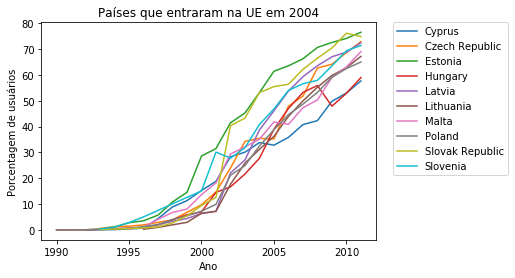

In [24]:
tempo = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011)
for i in ue2004:
    plt.plot(tempo,ue2004[i])
plt.title('Países que entraram na UE em 2004')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de usuários')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.figure(figsize=(100,10))
plt.show()

No gráfico acima, podemos ver que as porcentagens tendem a crescer rapidamente a partir de 1995, mas essa curva se torna menos acentuada próximo de 2007. É possível que o gráfico possua uma curva de formato "S", de modo que se estabilize por volta dos 80% ou 90% depois de 2011. Não é possível ver alguma correlação entre a entrada dos países na UE e o aumento de usuários.

### Alteração Percentual

O gráfico anterior nos deu uma visão geral do crescimento da população usuária de Internet nos países escolhidos, porém apenas isso não nos ajuda à verificar nossa hipotese. Abaixo, calculamos a alteração porcentual, de modo que que podemos entender como a quantidade de usuários varia com o tempo. Os gráficos foram feitos individualmente para melhor análise.

In [25]:
#cálculo da alteração percentual 
cypp = ue2004['Cyprus'].pct_change()
czep = ue2004['Czech Republic'].pct_change()
estp = ue2004['Estonia'].pct_change()
hngp = ue2004['Hungary'].pct_change()
ltvp = ue2004['Latvia'].pct_change()
litp = ue2004['Lithuania'].pct_change()
malp = ue2004['Malta'].pct_change()
polp = ue2004['Poland'].pct_change()
slkp = ue2004['Slovak Republic'].pct_change()
slvp = ue2004['Slovenia'].pct_change()

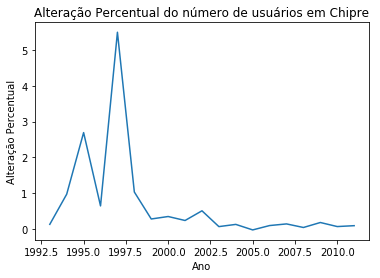

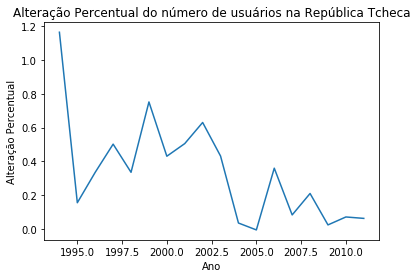

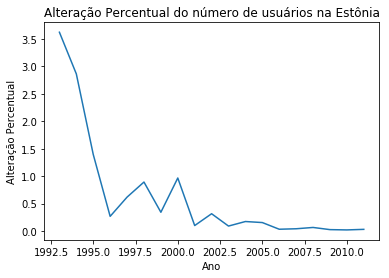

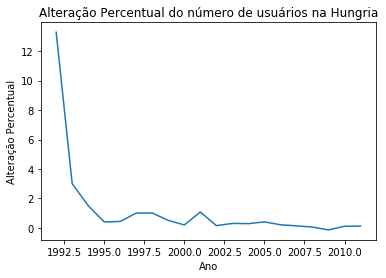

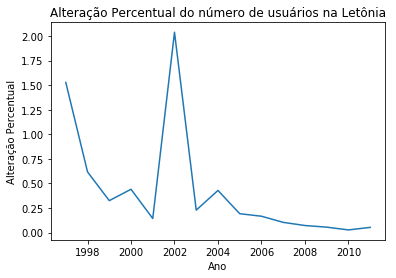

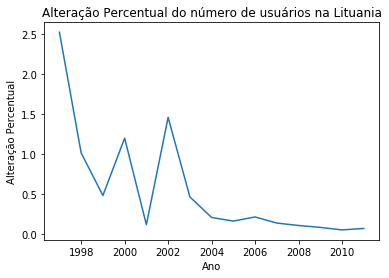

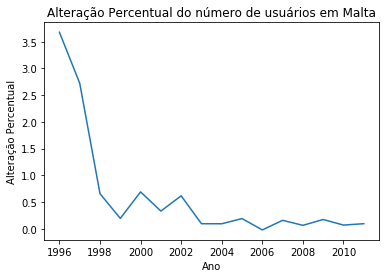

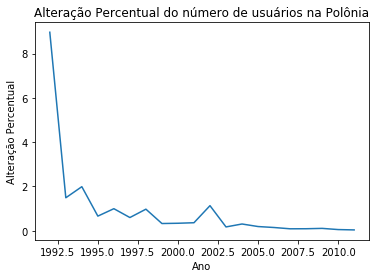

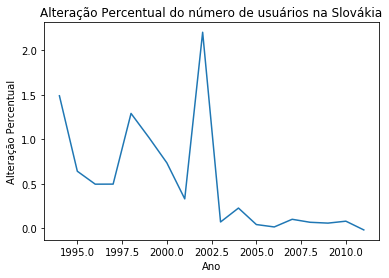

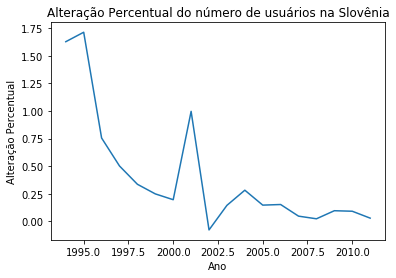

In [26]:
#plotagem dos gráficos
cypp_plot = plt.plot(tempo, cypp)
plt.title('Alteração Percentual do número de usuários em Chipre')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

czep_plot = plt.plot(tempo, czep)
plt.title('Alteração Percentual do número de usuários na República Tcheca')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

estp_plot = plt.plot(tempo, estp)
plt.title('Alteração Percentual do número de usuários na Estônia')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

hngp_plot = plt.plot(tempo, hngp)
plt.title('Alteração Percentual do número de usuários na Hungria')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

ltvp_plot = plt.plot(tempo, ltvp)
plt.title('Alteração Percentual do número de usuários na Letônia')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

litp_plot = plt.plot(tempo, litp)
plt.title('Alteração Percentual do número de usuários na Lituania')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

malp_plot = plt.plot(tempo, malp)
plt.title('Alteração Percentual do número de usuários em Malta')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

polp_plot = plt.plot(tempo, polp)
plt.title('Alteração Percentual do número de usuários na Polônia')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

slkp_plot = plt.plot(tempo, slkp)
plt.title('Alteração Percentual do número de usuários na Slovákia')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

slvp_plot = plt.plot(tempo, slvp)
plt.title('Alteração Percentual do número de usuários na Slovênia')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

#### Análise

Nos gráficos acima, percebemos que há uma grande variação nos primeiros anos, que se estabiliza pelos anos 2002, mas esse comportamento é esperado vendo que a World Wide Web só começou em 1990. Em 2004, ano que entraram na UE, e 2005, ano subsequente, não se notou grande variação na população internauta em quase nenhum país, apenas em Chipre(variação pequena), Letônia, Slovákia e Slovênia. Na maioria dos países, essa variação permaneceu constante. Inclusive, na República Tcheca, houve uma grande queda na variação nesse período. Na maioria desses países, o maior pico na variação ocorreu por volta dos anos 2000/2002.

Esses números podem ou não ser associados à entrada no bloco, portanto, para chegar em resultados mais conclusivos, veremos essa variação em países fora do bloco.

### Comparação de Dados

Para comparar os dados, utilizamos como critério a GDP(PPP) per capita no ano de 2004. Foram escolhidos, aleatóriamente, 5 países com GDP(PPP) per capita abaixo, similar ou acima da faixa que se encontram os países da UE analisados. Desse modo não apenas poderemos comparar o crescimento com países similares fora da UE, também poderemos investigar se o crescimento de internautas tem correlação com a riqueza do país.

Os seguintes países foram escolhidos para comparação:

Países com GDP(PPP) per capita em 2004 abaixo da faixa dos países da UE analisados:
    Brasil, Argentina, Maldivas, Albânia, Nigéria

Países com GDP(PPP) per capita em 2004 dentro da faixa dos países da UE analisados:
Chile, Russia, Coréia do Sul, Israel, Nova Zelândia

Países com GDP(PPP) per capita em 2004 acima da faixa dos países da UE analisados:
Japão, Porto Rico, Arábia Saudita, Honk Kong, Estados Unidos

### Gráficos de Porcentagem e Alteração Percentual

Tendo feito a seleção dos grupos que serão comparados, plotamos os gráficos das porcentagens de usuários da Internet para cada grupo (GDP inferior, similar e superior), além de gráficos da alteração percentual.

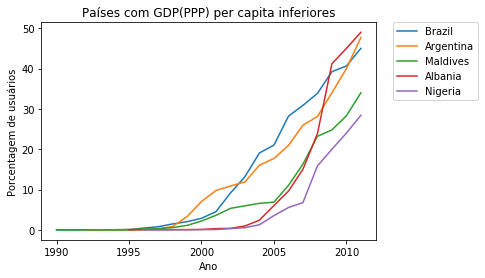

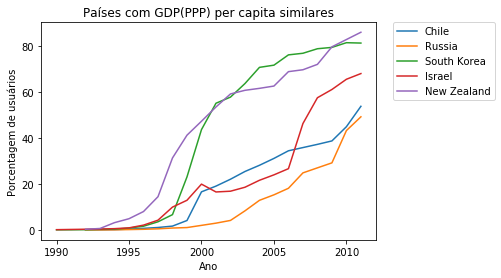

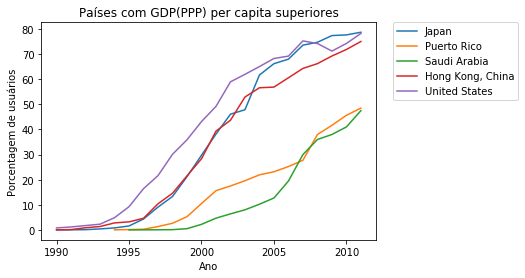

In [27]:
#gráficos da porcentagem de usuários ao longo do tempo
pmin = dados.loc[:,['Brazil','Argentina','Maldives','Albania','Nigeria']]
pnorm = dados.loc[:,['Chile','Russia','South Korea','Israel','New Zealand']]
pmax = dados.loc[:,['Japan','Puerto Rico','Saudi Arabia','Hong Kong, China','United States']]

for i in pmin:
    plt.plot(tempo,pmin[i])
plt.title('Países com GDP(PPP) per capita inferiores')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de usuários')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

for i in pnorm:
    plt.plot(tempo,pnorm[i])
plt.title('Países com GDP(PPP) per capita similares')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de usuários')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

for i in pmax:
    plt.plot(tempo,pmax[i])
plt.title('Países com GDP(PPP) per capita superiores')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de usuários')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Apenas analisando os gráficos acima, já podemos ver que o formato da curva de porcentagem dos países ingressantes se assemelha mais aos países com GDP(PPP) per capita superiores. Isso pode ser evidência ou de que o crescimento não está associado ao nível de riqueza do país, ou de que a entrada no bloco europeu promoveu um aumento do número de internautas acima do de países com nível econômico similar. Para chegar mais perto da conclusão, vamos examinar as alterações percentuais.

In [28]:
#cálculo da alteração percentual 
brzp = pmin['Brazil'].pct_change()
argp = pmin['Argentina'].pct_change()
madp = pmin['Maldives'].pct_change()
albp = pmin['Albania'].pct_change()
nigp = pmin['Nigeria'].pct_change()
chlp = pnorm['Chile'].pct_change()
rusp = pnorm['Russia'].pct_change()
skrp = pnorm['South Korea'].pct_change()
isrp = pnorm['Israel'].pct_change()
nzlp = pnorm['New Zealand'].pct_change()
japp = pmax['Japan'].pct_change()
prip = pmax['Puerto Rico'].pct_change()
sarp = pmax['Saudi Arabia'].pct_change()
hkgp = pmax['Hong Kong, China'].pct_change()
usap = pmax['United States'].pct_change()

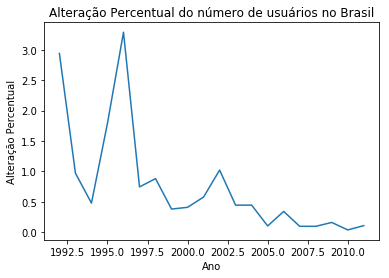

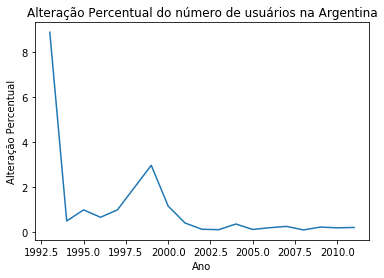

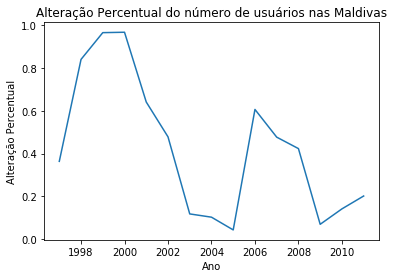

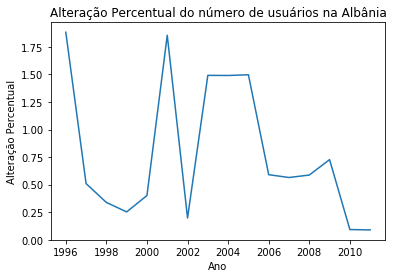

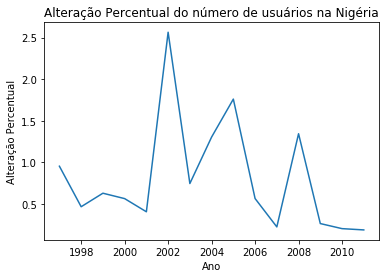

In [29]:
#alterações percentuais países com gdp inferior
brzp_plot = plt.plot(tempo, brzp)
plt.title('Alteração Percentual do número de usuários no Brasil')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

argp_plot = plt.plot(tempo, argp)
plt.title('Alteração Percentual do número de usuários na Argentina')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

madp_plot = plt.plot(tempo, madp)
plt.title('Alteração Percentual do número de usuários nas Maldivas')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

albp_plot = plt.plot(tempo, albp)
plt.title('Alteração Percentual do número de usuários na Albânia')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

nigp_plot = plt.plot(tempo, nigp)
plt.title('Alteração Percentual do número de usuários na Nigéria')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()


Nos gráficos acima, é possível notar que houve uma alteração percentual maior em 2004 e nos anos subsequentes nos países fora da UE e com GDP(PPP) per capita inferior do que nos países que ingressaram na UE nesse mesmo ano.

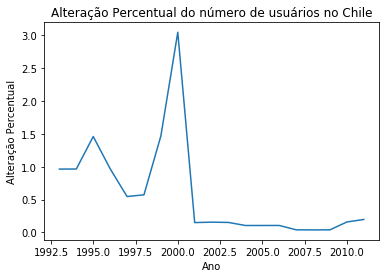

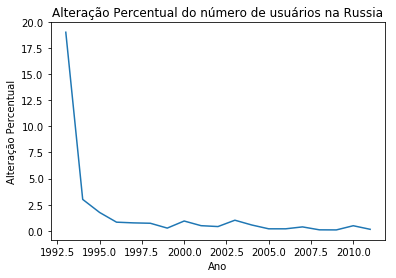

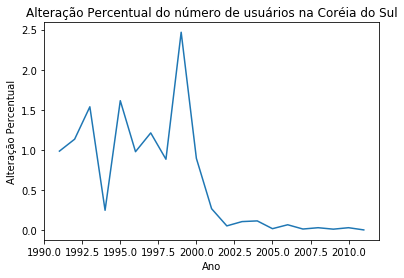

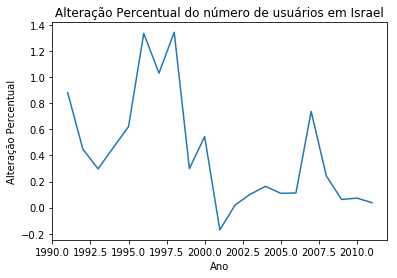

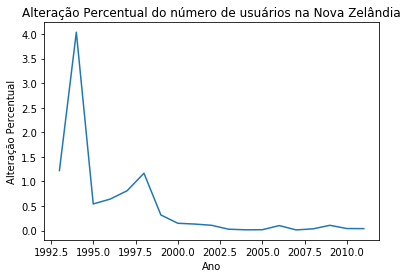

In [30]:
#alterações percentuais países com gdp similar
chlp_plot = plt.plot(tempo, chlp)
plt.title('Alteração Percentual do número de usuários no Chile')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

rusp_plot = plt.plot(tempo, rusp)
plt.title('Alteração Percentual do número de usuários na Russia')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

skrp_plot = plt.plot(tempo, skrp)
plt.title('Alteração Percentual do número de usuários na Coréia do Sul')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

isrp_plot = plt.plot(tempo, isrp)
plt.title('Alteração Percentual do número de usuários em Israel')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

nzlp_plot = plt.plot(tempo, nzlp)
plt.title('Alteração Percentual do número de usuários na Nova Zelândia')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()


Já nos gráficos de países com GDP(PPP) per capita similares aos estudados, se vê outro padrão: No Chile, na Coréia do Sul e em Israel, há um pico por volta dos anos 2000. Na Rússia e na Nova Zelândia, esse pico ocorre por volta dos anos 90-95, e logo decai ao ponto que tende à zero. Esses gráficos se assemelham mais aos países estudados.

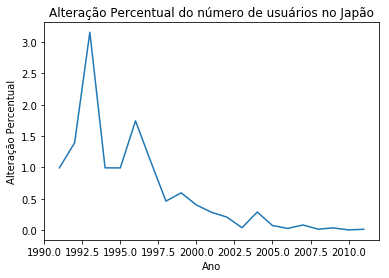

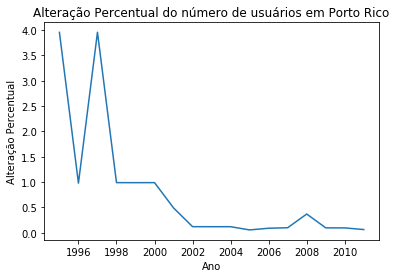

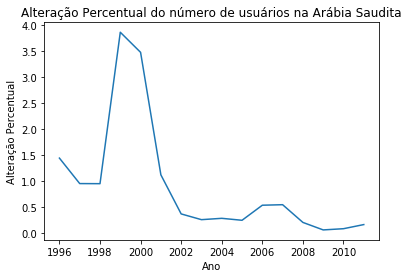

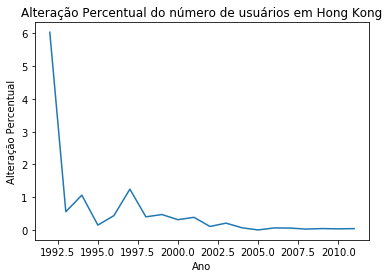

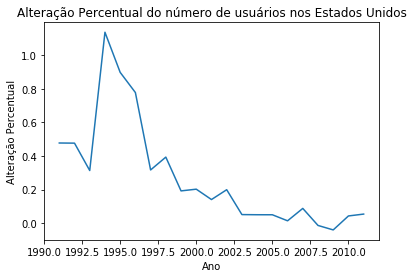

In [31]:
japp_plot = plt.plot(tempo, japp)
plt.title('Alteração Percentual do número de usuários no Japão')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

prip_plot = plt.plot(tempo, prip)
plt.title('Alteração Percentual do número de usuários em Porto Rico')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

sarp_plot = plt.plot(tempo, sarp)
plt.title('Alteração Percentual do número de usuários na Arábia Saudita')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

hkgp_plot = plt.plot(tempo, hkgp)
plt.title('Alteração Percentual do número de usuários em Hong Kong')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

usap_plot = plt.plot(tempo, usap)
plt.title('Alteração Percentual do número de usuários nos Estados Unidos')
plt.xlabel('Ano')
plt.ylabel('Alteração Percentual')
plt.show()

Nos países com GDP(PPP) per capita superior aos que entraram na UE em 2004, já dá pra se notar que o pico na sua variação acontece mais cedo do que nos outros países analisados.

### Análise


Em quase todos os gráficos, vemos um leve aumento entre os anos 93/95, o que é esperado vendo que a Internet só ficou realmente disponibilizada para o público em 1993. Antes disso, ela era utilizada apenas por universidades e pesquisadores. 

Nos países mais ricos, é possível enxergar um aumento quase instantâneo nos seus usuários de internet. Nos países com GDP(PPP) per capita similares aos países da UE de 2004, esse crescimento mais intenso ocorreu entre os anos de 1995 e 2000, assim como nos países mais pobres, apesar de esses ocorrerem de uma forma menos intensa e distribuida, muitos possuindo um pico nos anos por volta de 2004.

Isso nos leva a pensar que existe, sim, uma correlação entre nível de riqueza do país e a quantidade de usuários da internet.

## Conclusão

Como foi visto nos gráficos anteriores, há dados que mostram correlação entre o nível de riqueza dos países e a porcentagem da população usuária de internet. Porém a velocidade com que a quantidade de usuários cresce não parece ter mudado nos países que ingressaram na União Européia em relação com países com GDP(PPP) per capita similares aos seus, e de fato ocorre uma mudança maior nos países mais pobres por volta de 2004 do que nos países ingressantes. 

Com essas informações, concluimos que o número de usuários da internet é afetado pela riqueza de um país, mas não pela entrada na União Europeia. Porém, vendo como temos uma quantidade de dados limitada, isso pode apenas significar que a mudança na economia dos países que ingressam na UE não é tão rápida ou significativa. Se tivéssemos mais dados em relação à quantidade de internautas nesses países após a sua entrada na bloco, talvez a influência da entrada fosse mais visível.

